In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math

# **Problem 1: Euler's Method**


In [7]:
"""
The derivative function
"""
def derivative(t):
  return -2 * math.exp(-4 * t) - math.exp(-2 * t)

"""
The actual function
"""
def function(t):
  return 1 + (1/2) * math.exp(-4 * t) + (1/2) * math.exp(-2 * t)

### **b)**

In [57]:
"""
This function calculates Euler's method integration.
"""
def euler_method(derivative, target_value, initial_condition_value, h = 1):
  output = []
  x_values = [0]
  output.append(initial_condition_value)

  idx = 1
  t_value = 0

  while t_value <= target_value: # loop until we reach the highest value
    t_value += h

    x_values.append(t_value)
    output.append(output[idx - 1] + h * derivative(t_value))


  return output, x_values

"""
This function is for calculating the actual values of y
"""
def actual_values(function, t, initial_condition_value):
  output = []
  output.append(initial_condition_value)

  # loop over t
  for t_val in t:
    output.append(function(t_val))

  return output

In [58]:
t = 5
t_list = [1, 2, 3, 4, 5]

euler_method_output, x_values = euler_method(derivative = derivative, target_value = t, initial_condition_value= 1)
actual_method_output = actual_values(function = function, t = t_list, initial_condition_value= 1)

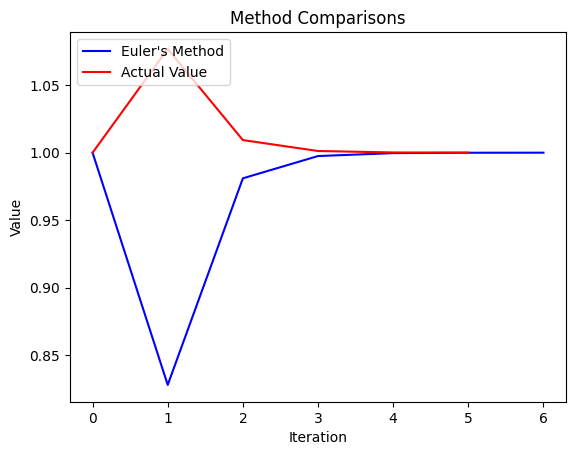

In [59]:
plt.plot(x_values, euler_method_output, color = 'blue', label = "Euler's Method")
plt.plot(actual_method_output, color = 'red', label = "Actual Value")
plt.title("Method Comparisons")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend(loc = "upper left")
plt.show()

## **c)**

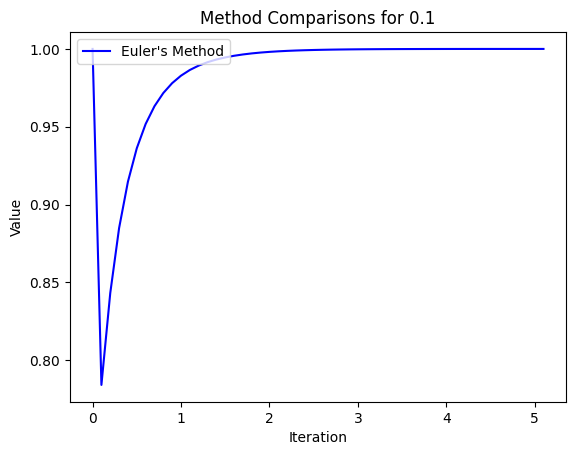

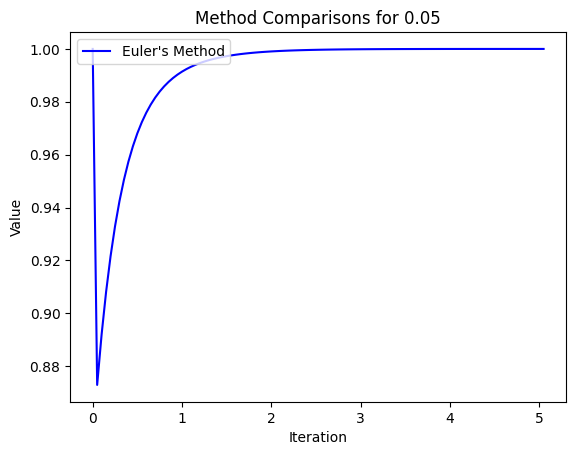

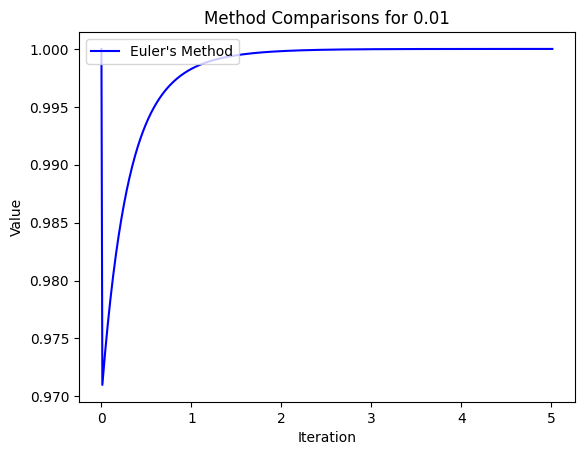

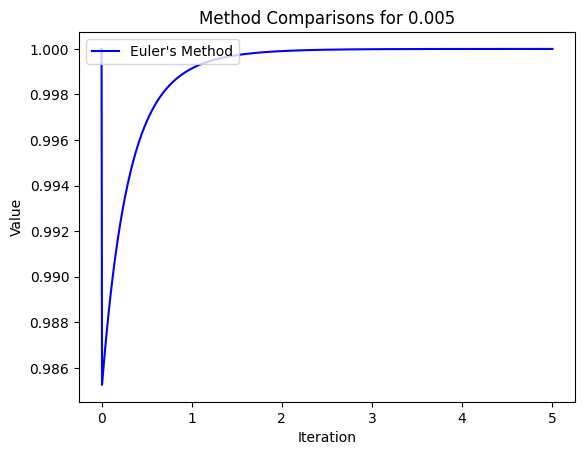

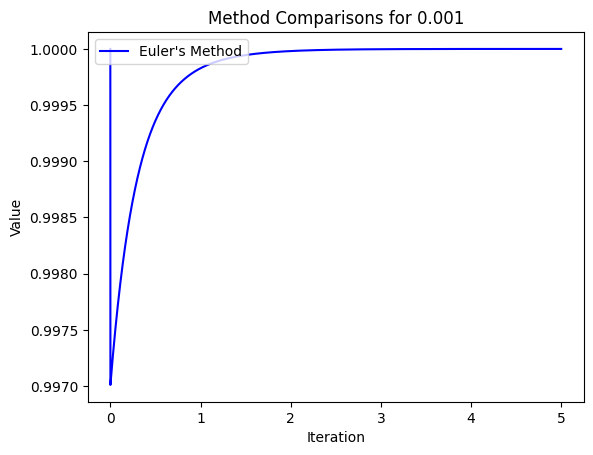

In [60]:
h_values = [.1, .05, .01, .005, .001] # try different h values

for h_value in h_values: # loop through all h values and plot them out separately
  euler_method_output, x_values = euler_method(derivative = derivative, target_value = t, initial_condition_value = 1, h = h_value)

  plt.plot(x_values, euler_method_output, color = 'blue', label = "Euler's Method")
  plt.title(f"Method Comparisons for {h_value}")
  plt.xlabel("Iteration")
  plt.ylabel("Value")
  plt.legend(loc = "upper left")
  plt.show()

### Read and visualize data

In [2]:
# All paths are relative. please change the current directory as per your file tree.

# Read in data as a 2, 100, 100 vector field'''
velocity= torch.load('v0.pt').numpy()
print("Dimension of velocity V0: ", velocity.shape)

# Read in data as a 1, 100, 100  image
source= torch.load('source.pt').numpy()
print("Dimension of image: ", source.shape)

Dimension of velocity V0:  (2, 100, 100)
Dimension of image:  (100, 100)


<ipython-input-2-e506a0c0198e>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  velocity= torch.load('v0.pt').numpy()
<ipython-input-2-e506a0c0198e>:8: FutureWarning: You ar

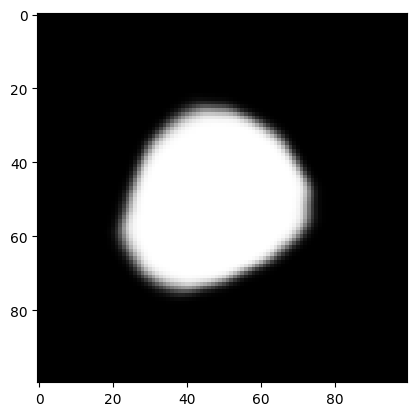

In [3]:
plt.imshow(source, cmap='gray')

### Gradient computation

In [4]:
def forward_difference_x(image):
    rows, cols = image.shape
    d = np.zeros((rows,cols))
    d[:,1:cols-1] = image[:,1:cols-1] - image[:,0:cols-2];
    d[:,0] = image[:,0] - image[:,cols-1];
    return d


def forward_difference_y(image):
    rows, cols = image.shape
    d = np.zeros((rows,cols))
    d[1:rows-1,:] = image[1:rows-1,:] - image[0:rows-2,:];
    d[0,:] = image[0,:] - image[rows-1,:];
    return d

def backward_difference_x(image):
    rows, cols = image.shape
    d = np.zeros((rows,cols))
    d[:,1:cols-1] = image[:,1:cols-1] - image[:,2:cols]
    d[:,-1] = image[:,-1] - image[:,0]
    return d

def backward_difference_y(image):
    rows, cols = image.shape
    d = np.zeros((rows,cols))
    d[1:rows-1,:] = image[1:rows-1,:] - image[2:rows,:]
    d[-1,:] = image[-1,:] - image[0,:]
    return d

def central_difference_x(image):
    cdif=(forward_difference_x(image)+backward_difference_x(image))/2
    return cdif

def central_difference_y(image):
    cdif=(forward_difference_y(image)+backward_difference_y(image))/2
    return cdif